<a href="https://colab.research.google.com/github/sarahouses/proyecto_telecom/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from typing import Callable, List, Dict, Tuple
from pathlib import Path
from pandas import json_normalize

from IPython.display import clear_output

#Paths

In [174]:
data_path = Path('src')

if not data_path.exists():
    data_path.mkdir(parents=True)  # 'parents=True' crea directorios intermedios si es necesario
    print("Directorio creado.")
else:
    print("El directorio ya existe.")

El directorio ya existe.


#📌 Extracción

In [175]:
#URL donde se encuentran los datos
url = 'https://raw.githubusercontent.com/sarahouses/proyecto_telecom/refs/heads/main/TelecomX_Data%20(1).json'
response = requests.get(url)
data = response.json()


In [176]:
data
df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [177]:
# Crear copia para mantener datos en su estado original por si se necesitan
df_copy = data.copy()

**customerID:** número de identificación único de cada cliente

**Churn:** si el cliente dejó o no la empresa

**gender:** género (masculino y femenino)

**SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner:** si el cliente tiene o no una pareja

**Dependents:** si el cliente tiene o no dependientes

**tenure**: meses de contrato del cliente

**PhoneService:** suscripción al servicio telefónico

**MultipleLines:** suscripción a más de una línea telefónica

**InternetService:** suscripción a un proveedor de internet

**OnlineSecurity:** suscripción adicional de seguridad en línea

**OnlineBackup:** suscripción adicional de respaldo en línea

**DeviceProtection:** suscripción adicional de protección del dispositivo

**TechSupport:** suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV:** suscripción de televisión por cable

**StreamingMovies:** suscripción de streaming de películas

**Contract:** tipo de contrato

**PaperlessBilling:** si el cliente prefiere recibir la factura en línea

**PaymentMethod:** forma de pago

**Charges.Monthly:** total de todos los servicios del cliente por mes

**Charges.Total:** total gastado por el cliente

In [178]:
type(df)

pandas.core.frame.DataFrame

In [179]:
for col in df.columns.tolist():
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        normalized_data = pd.json_normalize(df[col])
        df = df.drop(columns=[col]).join(normalized_data)

print(df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

#🔧 Transformación

In [180]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [181]:
#DUPLICADOS

duplicados = df.duplicated()

# Imprimir las filas duplicadas
print(df[duplicados])

# Imprimir el número de filas duplicadas
print(f'Número de filas duplicadas: {duplicados.sum()}')


Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]
Número de filas duplicadas: 0


In [182]:
#Valores unicos
for col in df.columns:
    # Encontrar los valores únicos en la columna
    valores_unicos = df[col].unique()

    # Imprimir los valores únicos
    print(f'Valores únicos en la columna {col}: {valores_unicos}')

Valores únicos en la columna customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores únicos en la columna Churn: ['No' 'Yes' '']
Valores únicos en la columna gender: ['Female' 'Male']
Valores únicos en la columna SeniorCitizen: [0 1]
Valores únicos en la columna Partner: ['Yes' 'No']
Valores únicos en la columna Dependents: ['Yes' 'No']
Valores únicos en la columna tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Valores únicos en la columna PhoneService: ['Yes' 'No']
Valores únicos en la columna MultipleLines: ['No' 'Yes' 'No phone service']
Valores únicos en la columna InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos en la columna OnlineBackup: ['Yes' 'No' 'No interne

In [183]:
#Valores nulos
# Verificar si hay valores nulos en el DataFrame
hay_valores_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_valores_nulos:
    print('Hay valores nulos en el DataFrame')
else:
    print('No hay valores nulos en el DataFrame')

# Verificar si hay valores nulos en cada columna
valores_nulos_por_columna = df.isnull().any()

# Imprimir el resultado
print('Valores nulos por columna:')
print(valores_nulos_por_columna)


No hay valores nulos en el DataFrame
Valores nulos por columna:
customerID          False
Churn               False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
Charges.Monthly     False
Charges.Total       False
dtype: bool


In [184]:
#Valores en blanco o vacíos
# Reemplazar cadenas vacías y cadenas que contienen solo espacios en blanco con NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# Vacíos o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

# Verificar si hay valores nulos en el DataFrame
hay_valores_nulos = df.isnull().any().any()

# Imprimir el resultado
if hay_valores_nulos:
    print('Hay valores nulos (antes en blanco o vacíos) en el DataFrame')
else:
    print('No hay valores nulos (antes en blanco o vacíos) en el DataFrame')

# Verificar si hay valores nulos en cada columna
valores_nulos_por_columna = df.isnull().any()

# Imprimir el resultado
print('Valores nulos por columna:')
print(valores_nulos_por_columna)

Hay valores nulos (antes en blanco o vacíos) en el DataFrame
Valores nulos por columna:
customerID          False
Churn                True
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
Charges.Monthly     False
Charges.Total        True
dtype: bool


In [185]:
# Convertir las columnas 'Charges.Monthly' a tipo float y "Charges.Total" (0 , los vacíos ) , "tenure" a tipo float, "SeniorCitizen" a float
df['Charges.Monthly'] = df['Charges.Monthly'].astype(float)

df['Charges.Total'] = df['Charges.Total'].fillna('0')   # los vacíos -> 0
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
charges_total_nan = df[df['Charges.Total'].isna()]

df['tenure']=df['tenure'].astype(float)
df['SeniorCitizen']=df['SeniorCitizen'].astype(float) # SeniorCitizen se mantiene como numérico para posible modelado posterior

#Vacios o en blanco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()
# Verificar el tipo de datos de las columnas
print(df.dtypes)


customerID           object
Churn                object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [186]:

# Ver valores únicos ANTES
print("Valores únicos en 'Churn' antes del reemplazo:", df['Churn'].unique())

# Convertir vacíos y espacios en NaN
df['Churn'] = df['Churn'].replace(r'^\s*$', np.nan, regex=True)

# Ver valores únicos DESPUÉS
print("Valores únicos en 'Churn' después del reemplazo:", df['Churn'].unique())

# Separar registros según estado de Churn
df_unknown = df[df['Churn'].isna()].copy()                 # trazabilidad
df_churn   = df[df['Churn'].isin(['Yes','No'])].copy()     # dataset principal
# df_unknown se conserva para auditoría, no se incluye en análisis de churn


# Etiquetar explícitamente los desconocidos
df_unknown['Churn'] = 'Unknown'

# Reporte claro
print(f'Registros con Churn desconocido: {df_unknown.shape[0]}')
print(f'Registros válidos para análisis de Churn: {df_churn.shape[0]}')

Valores únicos en 'Churn' antes del reemplazo: ['No' 'Yes' nan]
Valores únicos en 'Churn' después del reemplazo: ['No' 'Yes' nan]
Registros con Churn desconocido: 224
Registros válidos para análisis de Churn: 7043


In [187]:
# Normalización de categorías redundantes
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace('No phone service', 'No')

cols_int = [
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

for c in cols_int:
    df_churn[c] = df_churn[c].replace('No internet service', 'No')



#📊 Carga y análisis

In [188]:
df.describe()
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0.0,No,No,9.0,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0.0,No,No,4.0,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [189]:
#Análisis Descriptivo
df_churn.info()
df_churn.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   float64
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   float64
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


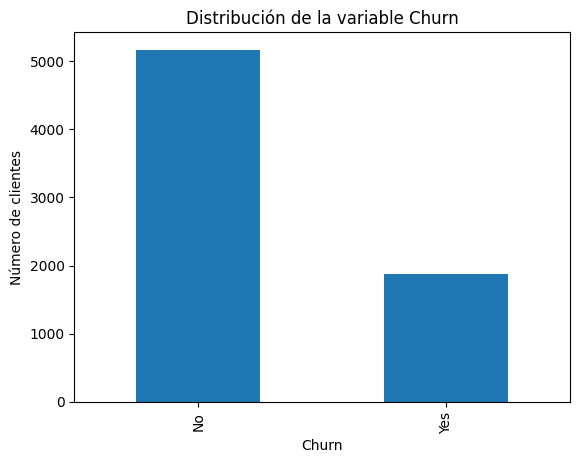

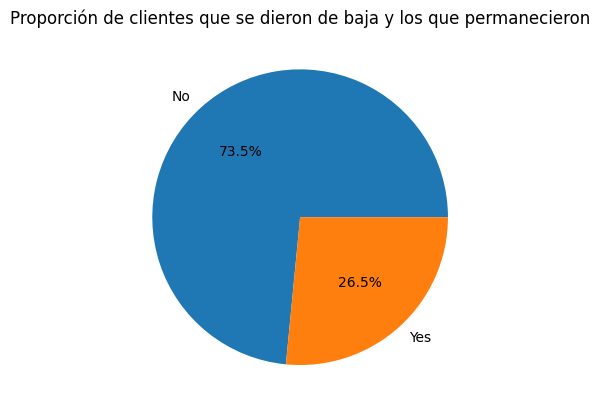

In [190]:
#Distribución de evasión
import matplotlib.pyplot as plt
# Contar el número de clientes que se dieron de baja y los que permanecieron
churn_counts = df_churn['Churn'].value_counts()

# Imprimir el número de clientes que se dieron de baja y los que permanecieron
print(churn_counts)

# Calcular la proporción de clientes que se dieron de baja y los que permanecieron
churn_proportions = df_churn['Churn'].value_counts(normalize=True)

# Imprimir la proporción de clientes que se dieron de baja y los que permanecieron
print(churn_proportions)

# Crear un gráfico de barras para visualizar la distribución de la variable 'Churn'
churn_counts.plot(kind='bar')
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()

# Crear un gráfico de torta para visualizar la proporción de clientes que se dieron de baja y los que permanecieron
churn_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de clientes que se dieron de baja y los que permanecieron')
plt.ylabel('')
plt.show()

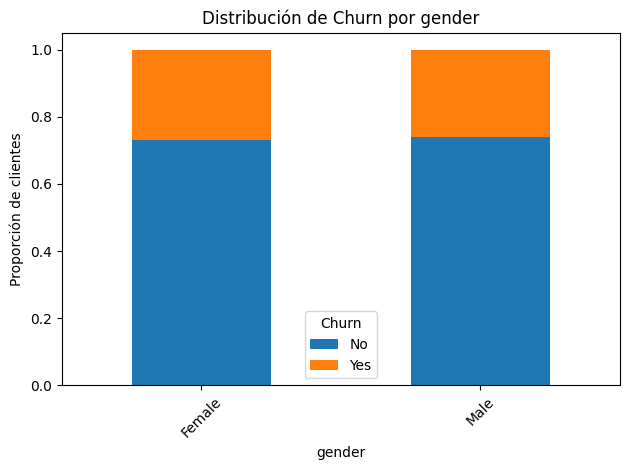

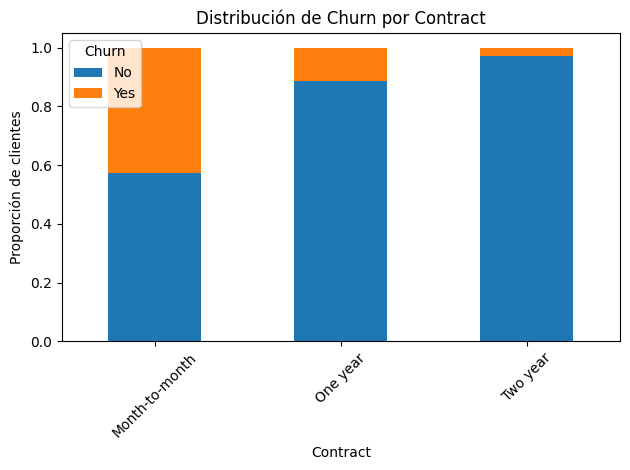

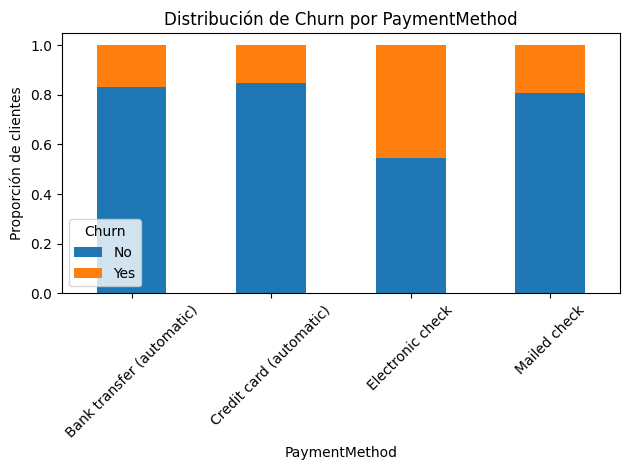

In [191]:
#Recuento de evasión por variables categóricas
# Lista de variables categóricas a analizar
categorical_features = ['gender', 'Contract', 'PaymentMethod']

# Bucle para analizar cada variable categórica
for feature in categorical_features:
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df_churn[feature], df_churn['Churn'])

    # Calcular la proporción de cada categoría de la variable categórica
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Crear gráfico de barras apiladas
    proportions.plot(kind='bar', stacked=True)
    plt.title(f'Distribución de Churn por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proporción de clientes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

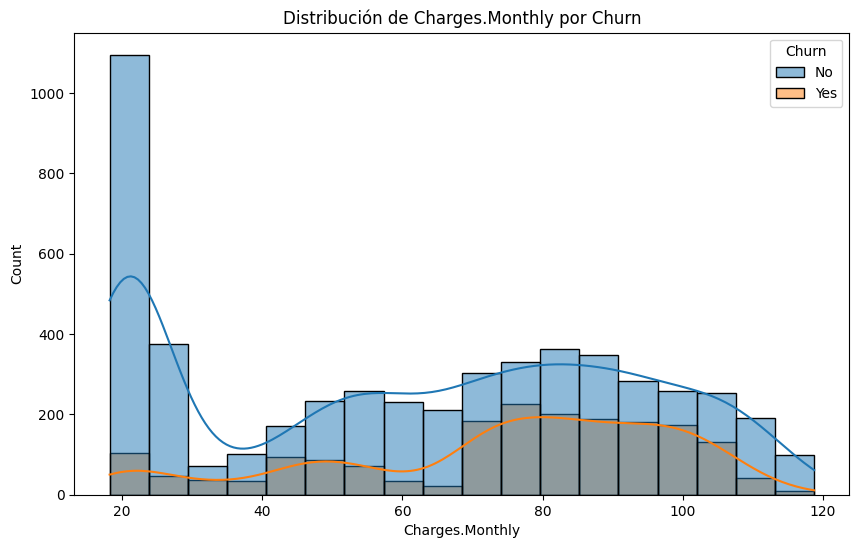

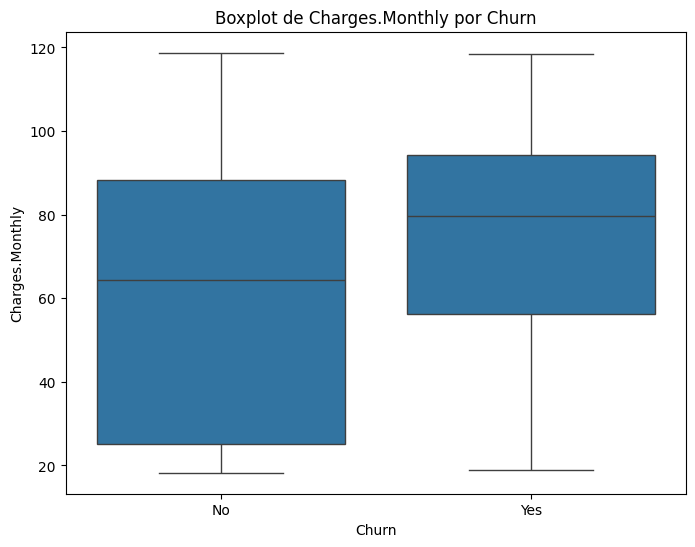

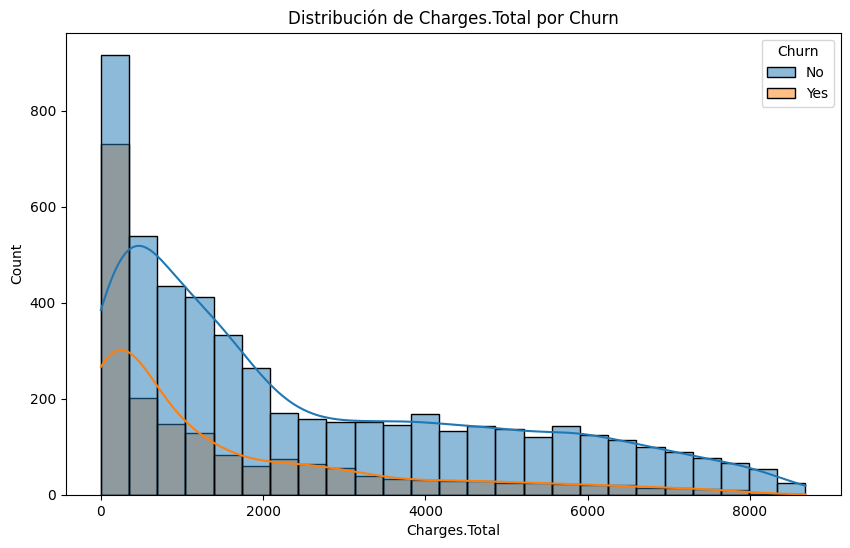

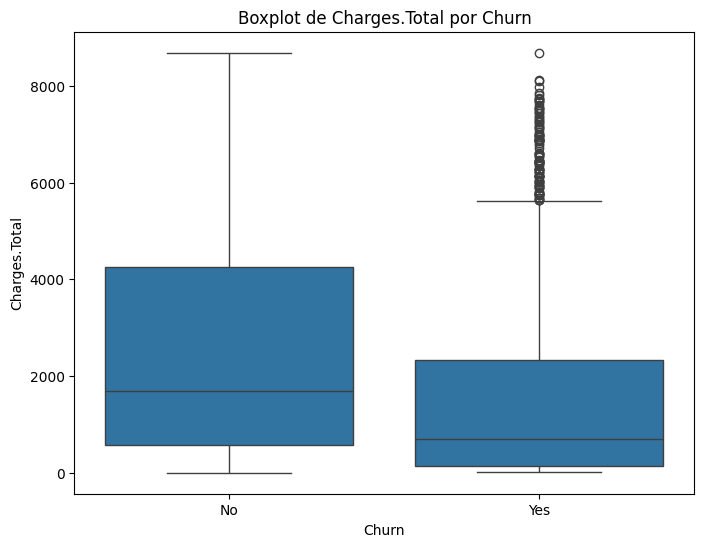

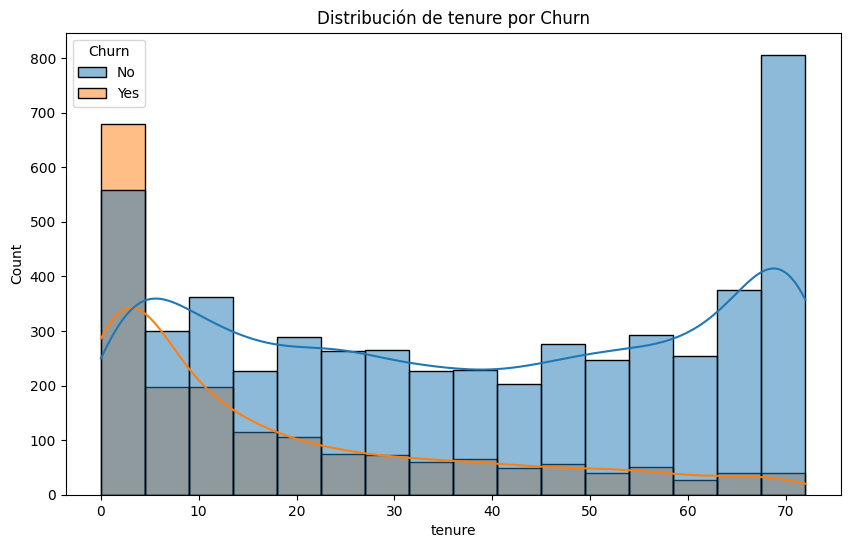

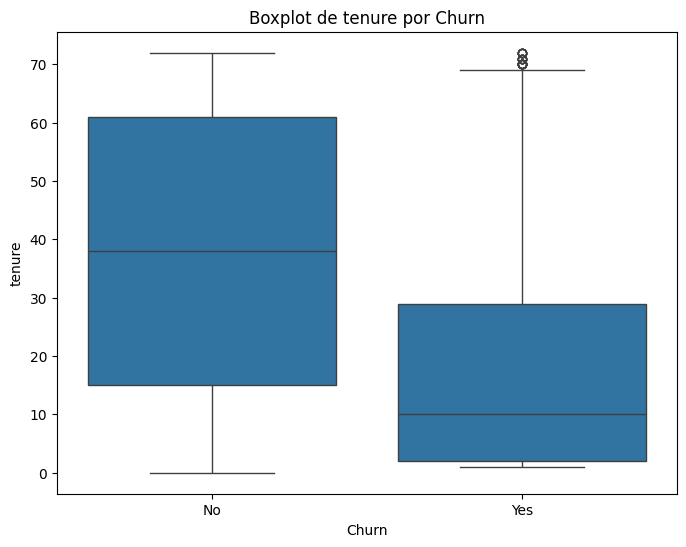

In [192]:
#Recuento de evasión por variables numéricas

# Lista de variables numéricas a analizar
numerical_features = ['Charges.Monthly', 'Charges.Total',"tenure"]

# Bucle para analizar cada variable numérica
for feature in numerical_features:
    # Crear histogramas
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_churn, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribución de {feature} por Churn')
    plt.show()

    # Crear diagramas de caja
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'Boxplot de {feature} por Churn')
    plt.show()



In [193]:
# Calcular estadísticas descriptivas por grupo
descriptive_stats = df_churn.groupby('Churn')['tenure'].describe()
print(f'Estadísticas descriptivas para tenure por Churn:\n{descriptive_stats}')

Estadísticas descriptivas para tenure por Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


#📄Informe final


### **Introducción**
El churn representa la tasa de abandono de clientes. Entender sus causas es clave para mejorar la retención, reducir costos de adquisición y fortalecer la fidelidad del cliente. El objetivo de este análisis es identificar las variables asociadas a la pérdida de clientes y proponer estrategias de retención.
###**Limpieza y tratamiento de los datos**
Se importaron los datos con pandas y se identificaron valores nulos en la columna TotalCharges, los cuales fueron eliminados. Se convirtió TotalCharges a numérico y se codificaron variables categóricas donde fue necesario.
Librerías utilizadas:
- `pandas` para manipulación de datos.
- `numpy` para operaciones estadísticas.
- `matplotlib` y `seaborn` para la visualización.
### Analisis, Exploración de los datos, Conclusiones y Recomendaciones
### **Por lo que se puede visualizar:**
-**En cuanto a la distribución general de Chrun**,más de 1 de cada 4 clientes abandona, lo cual es un porcentaje relevante para considerar acciones correctivas o preventivas.
-**El generó no es una variable diferenciadora**, ya que ambos géneros presentan tasas similares de abandono y permanencia


-**Por metodó de pago**:Los métodos automáticos (transferencia bancaria y tarjeta de crédito) tienen una menor proporción de churn, mientras que el cheque electrónico presenta la mayor tasa de abandono (Gráfico 1).Lo cual podría indicar que los métodos automáticos fomentan una mayor permanencia por comodidad o menor fricción.

-**Por tipo de contrato:** El churn se concentra fuertemente en clientes con contratos month-to-month (Gráfico 3), donde la proporción de abandono es visiblemente mayor. En cambio, los contratos de un año y dos años tienen tasas de churn considerablemente menores, lo que sugiere que los contratos más largos ayudan a retener clientes. *Como recomendación, sería incentivar contratos de mayor duración podría reducir la tasa de churn.*

-**Relación entre Churn y Tenure (antigüedad del cliente)**
Los clientes que no desertaron (Churn = No) tienen un tenure promedio de 37.6 meses. En cambio, los que sí desertaron (Churn = Yes) tienen un promedio mucho menor: 18 meses.
El boxplot muestra claramente que los clientes con menor antigüedad tienen más probabilidad de irse. EN cuanto a la distribución:La mayoría de los abandonos se concentran entre clientes con menos de 20 meses de permanencia.Por ende se concluyé que, la antigüedad es un fuerte predictor del churn. Los clientes nuevos son mucho más propensos a abandonar. Como recomendación sería *implementar programas de fidelización en los primeros 24 meses de servicio para reducir la pérdida temprana.*

-**Relación entre Churn y Cargos Totales (Charges.Total)**
El Boxplot nos muestra que: Los clientes que se quedaron (No) tienden a tener cargos totales más altos, lo cual está alineado con su mayor tiempo de permanencia. En cuanto a la distribución: El churn es más frecuente entre clientes con bajo cargo total, lo que refuerza la idea de que no duraron mucho tiempo como clientes, así que se puede concluir que hay una relación indirecta entre churn y cargos acumulados; los clientes que abandonan no llegan a acumular altos cargos por su menor tiempo de permanencia.

-**Relación entre Churn y Cargos Mensuales (Charges.Monthly)**
El Boxplot y en cuanto a la distribución: En este caso, los clientes que se dieron de baja (Yes) tienen un promedio mensual más alto de cargos que los que se quedan.Lo cual,esto sugiere que precios altos mensuales pueden generar insatisfacción o que quienes contratan servicios más caros abandonan más rápido si no perciben valor.Se pude concluir que, a diferencia del cargo total, los altos cargos mensuales se asocian a mayor churn, posiblemente por percepciones negativas de costo-beneficio. *Se recomienda monitorear satisfacción en clientes con planes más costosos y ofrecer beneficios extra o atención personalizada.*

**Como conclusión englobada:**

Los clientes más propensos a abandonar:

-Tienen contratos mensuales.

-Pagan mediante cheques electrónicos.

-Han estado menos de 20 meses en la empresa.

-Tienen altos cargos mensuales, pero bajo cargo acumulado.

*Es pertinente comentar que el género no es un factor determinante*.

